# FIR LPF design

Finite Impulse Response design for Low Pass Filter

December 17, 2018

In [1]:
%matplotlib inline

from numpy import linspace, sin, cos, exp, pi, abs, array, real, int16, append, log10, random
from scipy.io.wavfile import write
from scipy.signal import spectrogram, lfilter
from scipy.fftpack import fft, ifft, fftfreq, fftshift
import matplotlib.pyplot as plt
import peakutils
from IPython.display import display, Audio

import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

In [2]:
Fs = 80_000_000.0 / 32 / 128 # Sampling rate

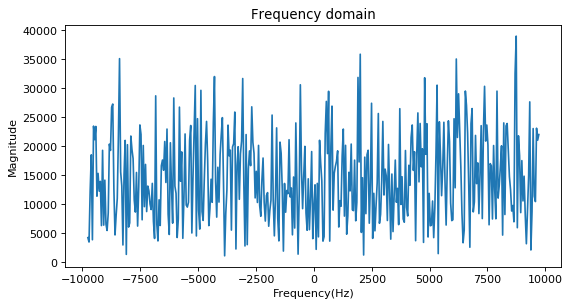

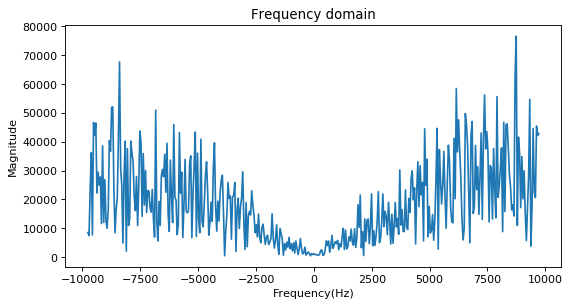

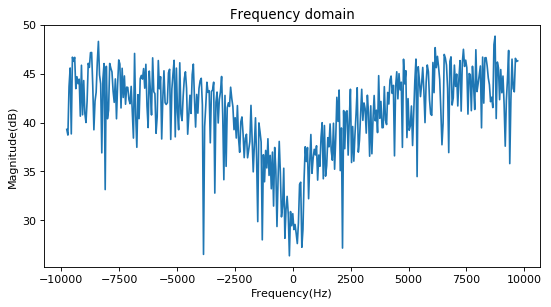

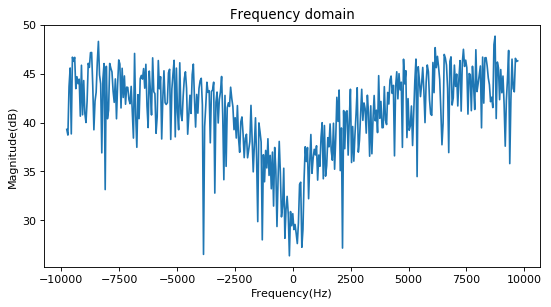

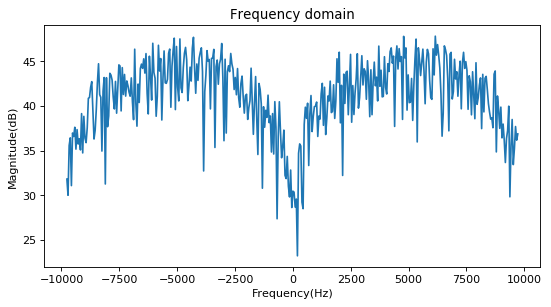

In [17]:
# Constant noise generator
AMPLITUDE = 1000
TIME_FRAME = 0.0205
SAMPLING_RATE = Fs

# Plot FFT frequency domain
def plot_fft(wave, thres=0.95, logscale=False):
    plt.figure(figsize=(8, 4), dpi=80)
    y = fftshift(fft(wave))
    freq = fftshift(fftfreq(len(y), 1/SAMPLING_RATE))

    a = abs(y)
    if logscale:
        plt.plot(freq, 10 * log10(a))
        plt.ylabel("Magnitude(dB)")
    else:
        plt.plot(freq, a)
        plt.ylabel("Magnitude")
    plt.xlabel("Frequency(Hz)")
    plt.title("Frequency domain")

    freq = fftshift(fftfreq(len(y), 1/SAMPLING_RATE))

def constant_tone(f=0, amp=AMPLITUDE, T=TIME_FRAME, phase=-pi/2.0, rot=1.0):
    t = linspace(0, T, int(T * SAMPLING_RATE))
    arg = (2 * pi * f * t) * rot + phase
    return cos(arg) * amp


# White noise generator
def white_noise(amp=AMPLITUDE, T=TIME_FRAME):
    a = random.random(int(T * SAMPLING_RATE)) * 2 * amp - amp
    b = random.random(int(T* SAMPLING_RATE)) * 2 * amp - amp
    return a + 1j * b
    
tone = white_noise()

plot_fft(tone, thres=0.7)

tone_hpf = lfilter([1,-0.97], 1, tone)
tone_lpf = lfilter([1,0.9], 1, tone_hpf)

plot_fft(tone_hpf, thres=0.7)

plot_fft(tone_hpf, thres=0.7, logscale=True)
plot_fft(tone_hpf, thres=0.7, logscale=True)
plot_fft(tone_lpf, thres=0.7, logscale=True)

## Output FIR coefficients for TrueSTUDIO

In [14]:
print('float32_t b[{}] = {{'.format(J+1), end='')
print('{0:.8f}'.format(b[-1]), end='')
for i in reversed(b[:-1]):
    print(', {0:.8f}'.format(i), end='')
print('};')

NameError: name 'J' is not defined